In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dbi = gpd.read_feather('../data/dbi_permits.geofeather')

In [5]:
homes = pd.read_excel('../data/Housing Production 2005-2022.xlsx')

In [6]:
date_cols = [c for c in dbi.columns if 'date' in c]

In [7]:
dbi[date_cols] = dbi[date_cols].apply(lambda x: pd.to_datetime(x, errors='coerce'))

In [8]:
cost_cols = [c for c in dbi.columns if 'cost' in c]

In [9]:
dbi[cost_cols] = dbi[cost_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [10]:
unit_cols = [c for c in dbi.columns if 'unit' in c]

In [11]:
dbi[unit_cols] = dbi[unit_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [12]:
costs = dbi[dbi.estimated_cost.notna() | dbi.revised_cost.notna()]

In [13]:
costs.shape

(1196056, 43)

In [14]:
costs = costs.drop_duplicates()

In [15]:
costs.shape

(1196056, 43)

In [16]:
costs = costs.copy()

In [17]:
costs.revised_cost.isna().mean()

0.3239973713605383

In [18]:
costs.estimated_cost.isna().mean()

0.11192368919181042

In [19]:
(costs.estimated_cost == costs.revised_cost).mean()

0.4424834623128014

In [20]:
(costs.estimated_cost < costs.revised_cost).mean()

0.10122770171296328

In [21]:
(costs.estimated_cost > costs.revised_cost).mean()

0.0203677754218866

In [22]:
costs['cost'] = costs.revised_cost

In [23]:
costs['cost'] = costs['cost'].fillna(costs.estimated_cost)

In [24]:
costs = costs[costs['cost'] > 1000]
costs = costs[~costs.permit_type_definition.isin(('otc alterations permit', 'sign - erect'))]

In [25]:
costs = costs.drop_duplicates()
costs.shape

(248293, 44)

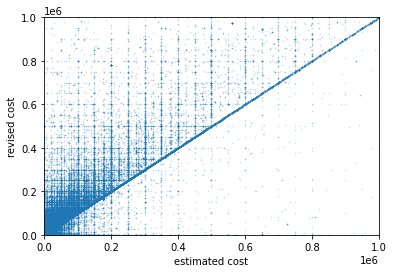

In [26]:
plt.scatter(dbi.estimated_cost, dbi.revised_cost, alpha=.25, s=.25)
plt.xlim((0, 1000000))
plt.ylim((0, 1000000))
plt.ylabel('revised cost')
plt.xlabel('estimated cost')
plt.show()

In [27]:
costs['new_units'] = costs['proposed_units'].fillna(0) - costs['existing_units'].fillna(0)

In [147]:
costs['new_units']

0           0.0
3           1.0
4           1.0
5           0.0
6           1.0
           ... 
1205121     2.0
1205122     1.0
1205123     1.0
1205124    15.0
1205125     0.0
Name: new_units, Length: 871160, dtype: float64

In [148]:
costs = costs.sort_values(['new_units'], ascending=False)

In [149]:
costs.columns

Index(['record_id', 'proposed_construction_type_description', 'issued_date',
       'existing_construction_type_description', 'zipcode',
       'neighborhoods_analysis_boundaries', 'fire_only_permit', 'proposed_use',
       'existing_use', 'description', 'tidf_compliance', 'revised_cost',
       'existing_construction_type', 'site_permit', 'plansets',
       'permit_creation_date', 'status_date',
       'first_construction_document_date', 'existing_units', 'filed_date',
       'street_name', 'block', 'estimated_cost', 'permit_expiration_date',
       'unit_suffix', 'proposed_construction_type', 'permit_type_definition',
       'status', 'completed_date', 'permit_number', 'street_number_suffix',
       'lot', 'number_of_existing_stories', 'street_suffix', 'proposed_units',
       'unit', 'permit_type', 'number_of_proposed_stories',
       'voluntary_soft_story_retrofit', 'supervisor_district', 'street_number',
       'structural_notification', 'geometry', 'cost', 'new_units'],
      dty

In [164]:
df = pd.merge(costs[['geometry', 'permit_creation_date', 'description', 'new_units', 'permit_type_definition',
                     'permit_number', 'cost']], homes, left_on='permit_number', right_on='BPA', how='inner')

In [165]:
df.permit_number.value_counts()

permit_number
200404232121    17
201406138394    15
201503110506    14
201305015894    12
200106252306    12
                ..
200603307960     1
200810063424     1
9901083S         1
200505122300     1
201209069084     1
Name: count, Length: 4227, dtype: int64

In [170]:
df.shape

(5581, 76)

In [171]:
homes.shape

(5275, 69)

In [177]:
df.drop_duplicates(['geometry', 'permit_creation_date', 'description', 'new_units', 'permit_type_definition',
                     'permit_number', 'cost', 'BPA', 'Net_Units_Completed'] + homes.columns.tolist())

,geometry,permit_creation_date,description,new_units,permit_type_definition,permit_number,cost,BPA,Keep/ Exclude,Address,...,Deed Restriction Type (Inclusionary/ Density Bonus),Assistance Program,Analysis Neighborhood,Planning Dist.,Zoning Dist.,Sup. Dist.,Existing Use,Existing Inventory Bldg Type,Proposed Inventory Bldg Type,Proposed Use
0,POINT (-122.41725 37.77582),2006-07-20,to erect a new 35 story 719 dwelling units wit...,719.0,new construction,200607207084,1.704666e+08,200607207084,Keep,1411 Market St,...,INC,NaN,South of Market,4 - Downtown,C-3-G,6,NaN,NaN,20+,apartments
1,POINT (-122.41814 37.77415),2016-06-20,"to erect 16 stories, 2 basement, office buildi...",550.0,new construction,201606200387,4.000000e+08,201606200387,Keep,1500 MISSION ST,...,INC,Bond Financed Inclusionary Housing,Mission,8 - Mission,C-3-G,6,NaN,NaN,20+,apartments
2,POINT (-122.41814 37.77415),2016-06-20,"to erect 16 stories, 2 basement, office buildi...",550.0,new construction,201606200387,4.000000e+08,201606200387,Keep,1500 MISSION ST,...,INC,Bond Financed Inclusionary Housing,Mission,8 - Mission,C-3-G,6,NaN,NaN,20+,apartments
3,POINT (-122.41814 37.77415),2016-06-20,"to erect 16 stories, 2 basement, office buildi...",550.0,new construction,201606200387,4.000000e+08,201606200387,Keep,1500 MISSION ST,...,INC,Bond Financed Inclusionary Housing,Mission,8 - Mission,C-3-G,6,NaN,NaN,20+,apartments
4,POINT (-122.41814 37.77415),2016-06-20,"to erect 16 stories, 2 basement, office buildi...",550.0,new construction,201606200387,4.000000e+08,201606200387,Keep,1500 MISSION ST,...,INC,Bond Financed Inclusionary Housing,Mission,8 - Mission,C-3-G,6,NaN,NaN,20+,apartments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,POINT (-122.41932 37.77753),2018-04-05,"to demolish 3 stories, 27 units, apartments bu...",-27.0,demolitions,201804055644,1.470000e+05,201804055644,Keep,200 VAN NESS AV,...,NaN,NaN,Tenderloin,4 - Downtown,C-3-G,6,apartments,20+,20+,NaN
5577,POINT (-122.39807 37.71879),2010-06-24,demolish motel for 44 dwelling unit,-44.0,demolitions,201006245204,2.500000e+04,201006245204,Keep,6600 03rd St,...,NaN,NaN,Bayview Hunters Point,10 - South Bayshore,RM-1,10,tourist hotel/motel,20+,20+,NaN
5578,POINT (-122.41357 37.77910),2010-10-26,demo portn 4 stry wing of (e) bldg closest to ...,-52.0,additions alterations or repairs,201010263766,1.200000e+06,201010263766,Keep,1167 Market St,...,NaN,NaN,South of Market,4 - Downtown,C-3-G,6,apartments,20+,20+,apartments
5579,POINT (-122.41350 37.77841),2010-10-26,demo portn 4 stry wing of (e) bldg closest to ...,-52.0,additions alterations or repairs,201010263766,1.200000e+06,201010263766,Keep,1167 Market St,...,NaN,NaN,South of Market,4 - Downtown,C-3-G,6,apartments,20+,20+,apartments


In [174]:
homes.drop_duplicates().shape

(5275, 69)